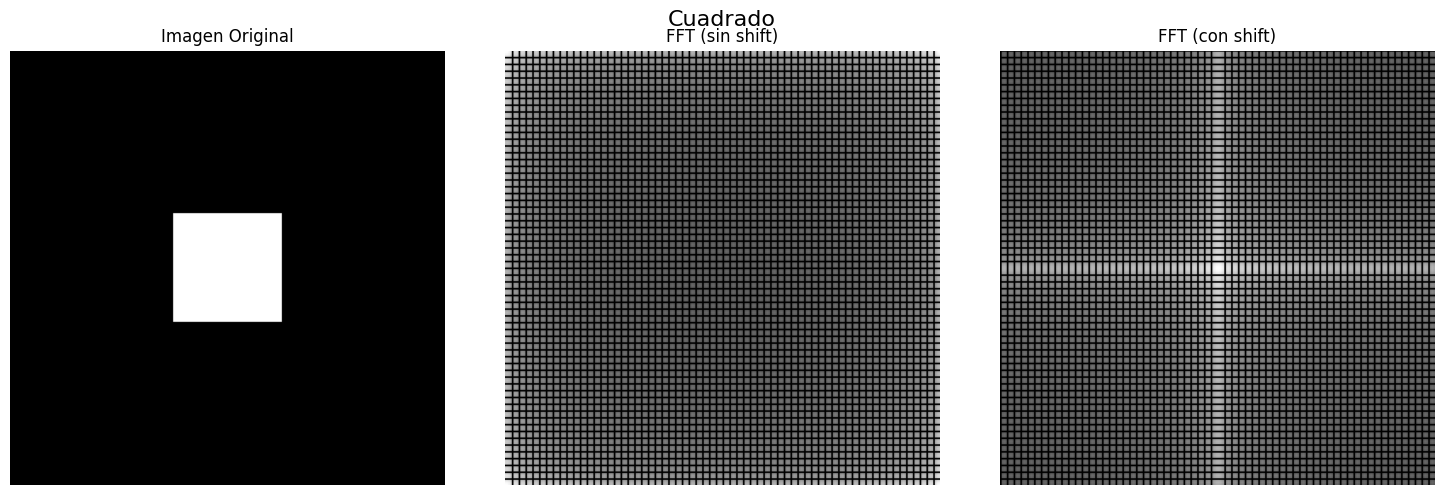

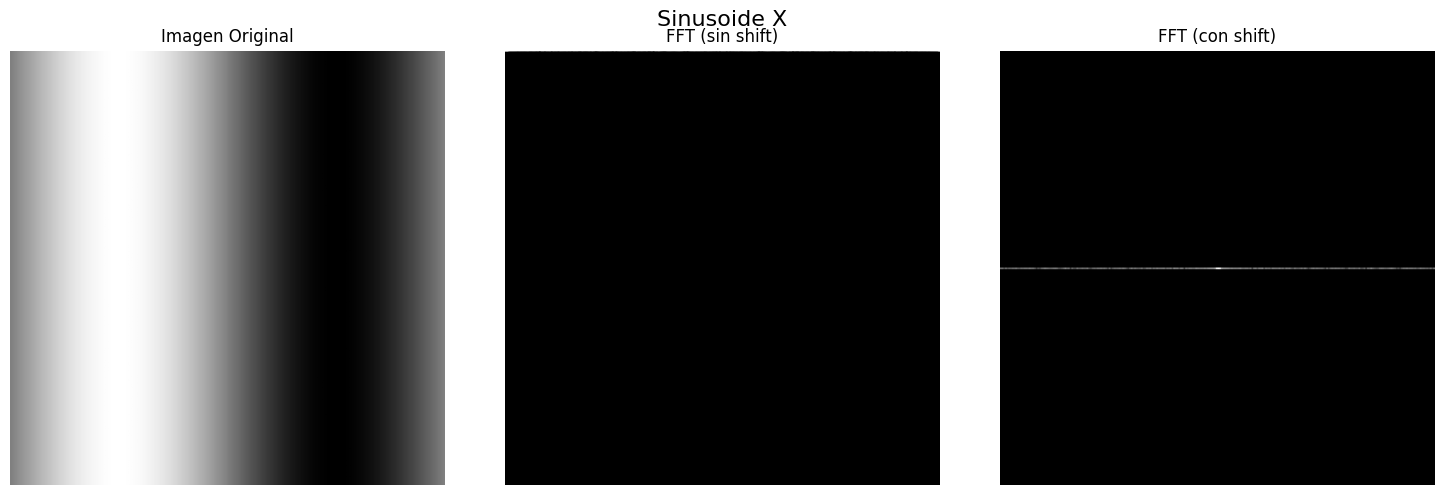

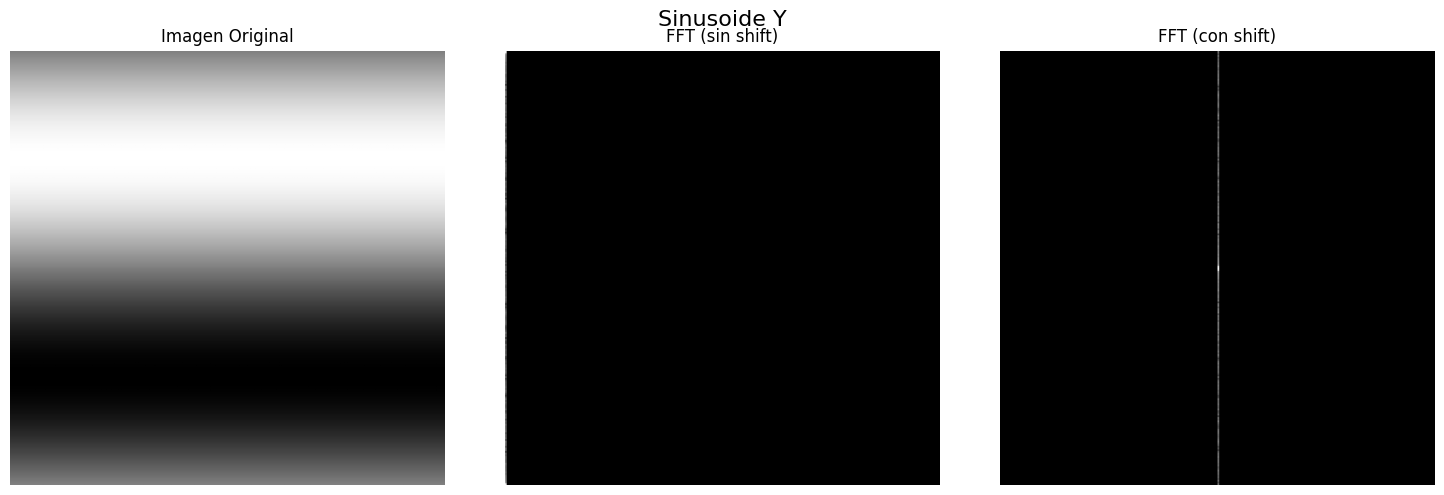

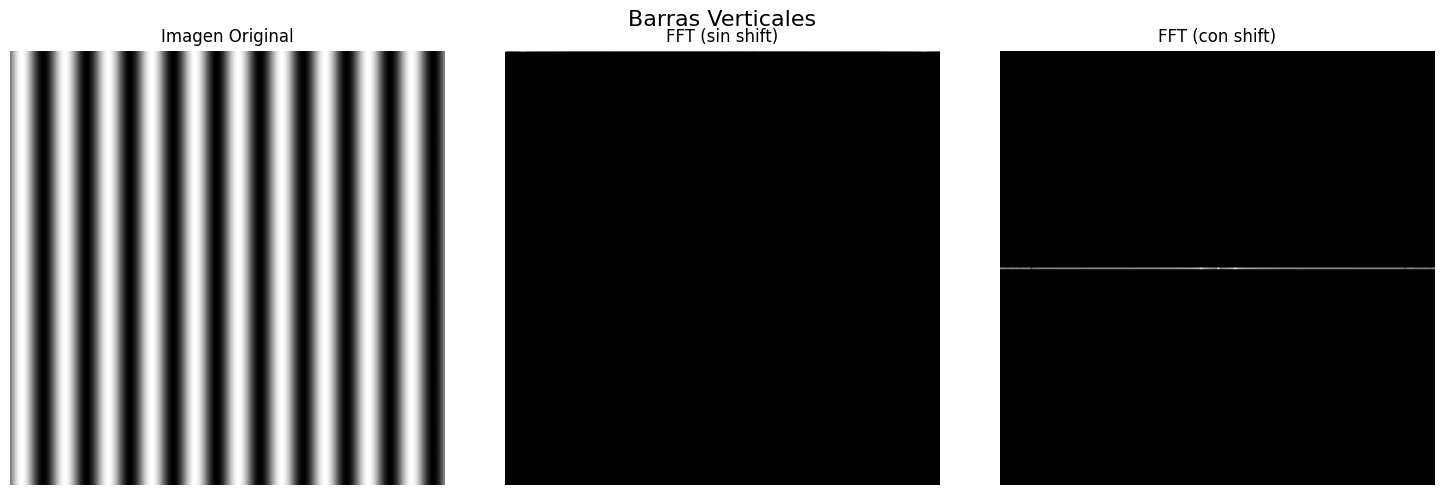

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generar_patrones(tamano=256):
    x = np.linspace(0, 2*np.pi, tamano)
    y = np.linspace(0, 2*np.pi, tamano)
    X, Y = np.meshgrid(x, y)
    
    patrones = {}
    
    cuadrado = np.zeros((tamano, tamano))
    centro = tamano // 2
    size = tamano // 8
    cuadrado[centro-size:centro+size, centro-size:centro+size] = 255
    patrones['cuadrado'] = cuadrado
    
    patrones['sinusoide_x'] = 127.5 + 127.5 * np.sin(X)
    patrones['sinusoide_y'] = 127.5 + 127.5 * np.sin(Y)
    patrones['barras_verticales'] = 127.5 + 127.5 * np.sin(50*X)
    
    return {k: np.clip(v, 0, 255).astype(np.uint8) for k, v in patrones.items()}

def mostrar_patron(patron, titulo):
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    fig.suptitle(titulo, fontsize=16)
    
    fft_raw = np.fft.fft2(patron)
    fft_shift = np.fft.fftshift(fft_raw)
    
    axes[0,0].imshow(patron, cmap='gray')
    axes[0,0].set_title('Imagen Original')
    axes[0,0].axis('off')
    
    axes[0,1].imshow(np.log(np.abs(fft_raw) + 1), cmap='hot')
    axes[0,1].set_title('FFT (sin shift)')
    axes[0,1].axis('off')
    
    axes[0,2].imshow(np.log(np.abs(fft_shift) + 1), cmap='hot')
    axes[0,2].set_title('FFT (con shift)')
    axes[0,2].axis('off')
    
    axes[1,0].plot(patron[128, :])
    axes[1,0].set_title('Perfil Horizontal')
    axes[1,0].grid(True)
    
    axes[1,1].plot(patron[:, 128])
    axes[1,1].set_title('Perfil Vertical')
    axes[1,1].grid(True)
    
    axes[1,2].plot(np.abs(fft_shift[128, :]))
    axes[1,2].set_title('Espectro FFT')
    axes[1,2].grid(True)
    axes[1,2].set_yscale('log')
    
    plt.tight_layout()
    plt.show()

def mostrar_fft_lado_a_lado():
    patrones = generar_patrones()
    
    for nombre, patron in patrones.items():
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(nombre.replace('_', ' ').title(), fontsize=16)
        
        fft_raw = np.fft.fft2(patron)
        fft_shift = np.fft.fftshift(fft_raw)
        
        axes[0].imshow(patron, cmap='gray')
        axes[0].set_title('Imagen Original')
        axes[0].axis('off')
        
        axes[1].imshow(np.log(np.abs(fft_raw) + 1), cmap='gray')
        axes[1].set_title('FFT (sin shift)')
        axes[1].axis('off')
        
        axes[2].imshow(np.log(np.abs(fft_shift) + 1), cmap='gray')
        axes[2].set_title('FFT (con shift)')
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()

def mostrar_todos():
    patrones = generar_patrones()
    
    for nombre, patron in patrones.items():
        titulo = nombre.replace('_', ' ').title()
        mostrar_patron(patron, titulo)

mostrar_fft_lado_a_lado()